In [1]:
import warnings
warnings.filterwarnings("ignore")

### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset inspection

In [3]:
rental_df = pd.read_csv("day.csv")
rental_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
rental_df.shape

(731, 16)

In [5]:
rental_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Data Cleaning or Pre-processing

- There are no null values in the dataset

In [7]:
rental_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Column names seem as bit confusing. Hence we change the column names for redability

In [8]:
rental_df.rename(columns= {"dteday": "date",
                            "yr": "year",
                            "mnth": "month",
                            "weathersit": "weather_code",
                            "atemp" : "feelslike_temp",
                            "hum": "humidity",
                            "cnt": "demand"}, inplace= True)
rental_df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_code', 'temp', 'feelslike_temp', 'humidity',
       'windspeed', 'casual', 'registered', 'demand'],
      dtype='object')

- We can delete a few columns
    1. instant
    2. casual
    3. registered

In [9]:
rental_df.drop(["date", "instant", "casual", "registered"], axis= 1, inplace= True)

### Map Values in Columns


- Season {1: spring, 2: summer, 3: fall, 4: winter}
- Year {0: 2011, 1: 2012}

In [10]:
rental_df.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace= True)
rental_df.year.replace({0: "2011", 1: "2012"},inplace= True)

- Changing the data type of Weather Code to render it as categorical feature

In [11]:
rental_df.weather_code = rental_df.weather_code.astype(str)

### Data Visualisation

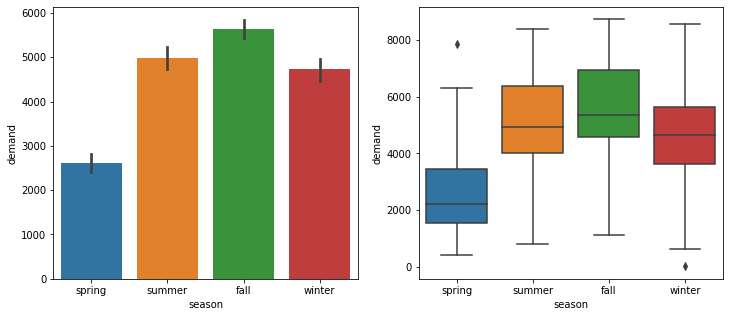

In [12]:
plt.figure(figsize= [12,5])
plt.subplot(1,2,1)
sns.barplot(data= rental_df, x= "season", y= "demand")
plt.subplot(1,2,2)
sns.boxplot(data= rental_df, x= "season", y= "demand")
plt.show()

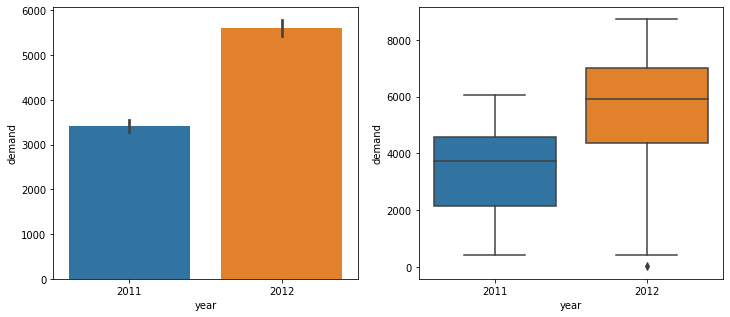

In [13]:
plt.figure(figsize= [12,5])
plt.subplot(1,2,1)
sns.barplot(data= rental_df, x= "year", y= "demand")
plt.subplot(1,2,2)
sns.boxplot(data= rental_df, x= "year", y= "demand")
plt.show()

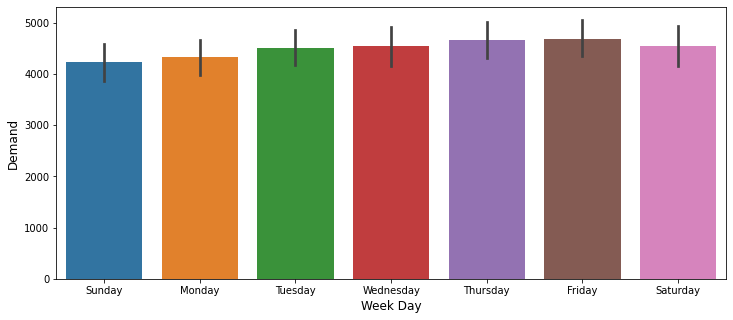

In [14]:
plt.figure(figsize= [12,5])
sns.barplot(data= rental_df, x= "weekday", y= "demand")
plt.xticks(ticks= [0, 1,2,3,4,5,6],labels= ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.xlabel("Week Day", fontdict= {"size": 12})
plt.ylabel("Demand", fontdict= {"size": 12})
plt.show()

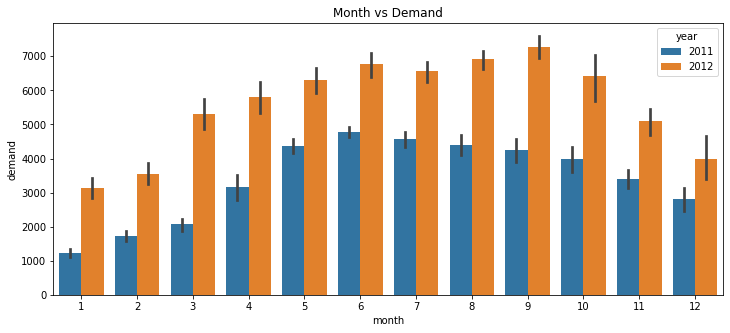

In [15]:
    plt.figure(figsize= [12,5])
    sns.barplot(data= rental_df, x= "month", y= "demand", hue= "year")
    plt.title("Month vs Demand")
    plt.show()

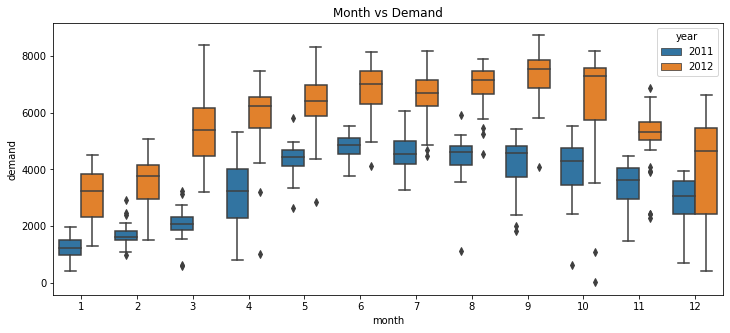

In [16]:
plt.figure(figsize= [12,5])
sns.boxplot(data= rental_df, x= "month", y= "demand", hue= "year")
plt.title("Month vs Demand")
plt.show()

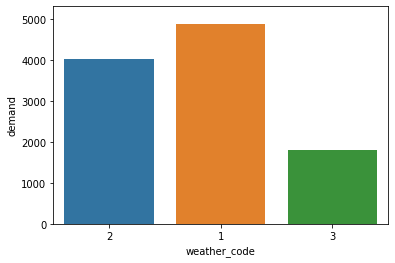

In [17]:
sns.barplot(data= rental_df, x= "weather_code", y= "demand", errwidth= 0)
plt.show()

- Weather Code
    - [1] Clear, Few clouds, Partly cloudy, Partly cloudy
    - [2] Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - [3] Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

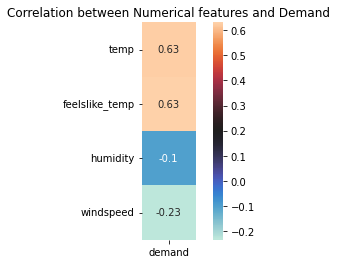

In [18]:
correlation_matrix = rental_df[["temp","feelslike_temp","humidity","windspeed","demand"]].corr()
correlation_matrix = correlation_matrix.loc[:"windspeed", ["demand"]]
sns.heatmap(correlation_matrix, annot= True, center= 0.2, square= True)
plt.title("Correlation between Numerical features and Demand")
plt.show()

### Dealing with categorical features

In [19]:
season = pd.get_dummies(data= rental_df["season"], drop_first= True, prefix= "season")
year = pd.get_dummies(data= rental_df["year"], drop_first= True, prefix= "year")
weather = pd.get_dummies(data= rental_df["weather_code"], drop_first= True, prefix= "weather_code")
rental_final = pd.concat([rental_df, season, year, weather], axis= 1)
rental_final.drop(["season", "year", "weather_code"], axis= 1, inplace= True)
rental_final.head()

,month,holiday,weekday,workingday,temp,feelslike_temp,humidity,windspeed,demand,season_spring,season_summer,season_winter,year_2012,weather_code_2,weather_code_3
0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,985,1,0,0,0,1,0
1,1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,0,0,1,0
2,1,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,0,0,0,0
3,1,0,2,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,0,0,0,0
4,1,0,3,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,0,0,0,0


### Separate feature dataframe and label dataframe

In [20]:
y = rental_final[["demand"]]
X = rental_final.drop("demand", axis= 1)

### Split data into train and test set

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, test_size= 0.25, random_state= True)

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print("Accuracy on Training set:", lr_model.score(x_train, y_train))
print("Accuracy on Test set    :",metrics.r2_score(y_test,y_pred))

Accuracy on Training set: 0.8213089686170182
Accuracy on Test set    : 0.8340706580692383


### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
rf_model = DecisionTreeRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print("Accuracy on Training set:", rf_model.score(x_train, y_train))
print("Accuracy on Test set    :", metrics.r2_score(y_test, y_pred))

Accuracy on Training set: 1.0
Accuracy on Test set    : 0.8139124285442454


### Random Forest with Hyperparameter Tuning

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [25]:
parameters = {"n_estimators" : [25, 50, 100],
              "max_depth": [11, None],
              "min_samples_leaf": [2, 5, 7],
              "min_samples_split": [5, 10, 15]}

In [26]:
rf_classifier = RandomForestRegressor(criterion= "squared_error", random_state= 0)

In [27]:
grid_search = GridSearchCV(rf_classifier, parameters, cv= 5, return_train_score= True, n_jobs= -1)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [28]:
modelf = RandomForestRegressor(n_estimators= grid_search.best_params_["n_estimators"],
                                max_depth= grid_search.best_params_["max_depth"],
                                min_samples_leaf= grid_search.best_params_["min_samples_leaf"],
                                min_samples_split= grid_search.best_params_["min_samples_split"])

In [29]:
modelf.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=50)

In [30]:
y_pred = modelf.predict(x_test)
print("Accuracy on Training set:", modelf.score(x_train, y_train))
print("Accuracy on Test set    :", metrics.r2_score(y_test.values, y_pred))

Accuracy on Training set: 0.9649500145154307
Accuracy on Test set    : 0.8908881010294223


### Error for the Final Model

In [31]:
print("Mean Absolute Error     :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error      :", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R squared Error         :", metrics.r2_score(y_test, y_pred))

Mean Absolute Error     : 448.9412108865632
Mean Squared Error      : 427807.6204973528
Root Mean Squared Error : 654.0700425010709
R squared Error         : 0.8908881010294223


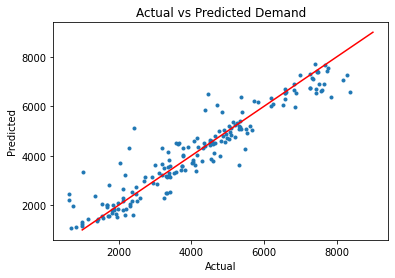

In [32]:
plt.scatter(y_test['demand'].values, y_pred, marker= '.')
plt.plot([1000,9000], [1000,9000], color= 'r')
plt.yticks(ticks= [2000, 4000, 6000, 8000])
plt.title("Actual vs Predicted Demand")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()